Note: in most of the tasks there can be other acceptable solutions, depending on how you set various parameters; the important thing in the evaluation is that you justify your choices appropriately.

### Task 1 Association rules analysis, 12 points 
You have to perform market basket analysis using the data from 'grocery assignment.csv'. The columns of interest in this case are 'transaction id' and 'itemDescription', and the data is in the format we have encountered before: we have several
rows for each transaction, one row for each item that is part of the transaction. Transform the data into transactional format, extract frequent item-sets and create association rules as it was done in the course material. (Note: you may have to use much smaller threshold values for support and confidence than in the lectures; experiment with different values until you get
a reasonable amount of item-sets and rules). Do the extracted rules seem to contain useful
information or only trivial observations? Specifically, what would you recommend to a person
(i.e. what is the consequent in association rules terminology) when you now that in the basket
there is already (i) sausage, (ii) tropical fruit, (iii) sausage AND tropical fruit?

In [1]:
#  Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mlxtend.preprocessing
import mlxtend.frequent_patterns

In [14]:
# Import data
grocery = pd.read_csv('grocery_assignment.csv', index_col=0)
grocery.head(10)

,transaction_id,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1,5000,2015-10-02,soda,2015,10,2,4
1,1,5000,2015-10-02,root vegetables,2015,10,2,4
2,1,5000,2015-10-02,semi-finished bread,2015,10,2,4
3,2,5000,2014-11-16,bottled beer,2014,11,16,6
4,2,5000,2014-11-16,other vegetables,2014,11,16,6
5,3,5000,2014-09-03,fruit/vegetable juice,2014,9,3,2
6,3,5000,2014-09-03,onions,2014,9,3,2
7,4,4999,2015-12-26,bottled water,2015,12,26,5
8,4,4999,2015-12-26,herbs,2015,12,26,5
9,5,4999,2015-05-16,butter milk,2015,5,16,5


In [17]:
# Creating transactional format

grocery_list = grocery.groupby(['transaction_id'])['itemDescription'].apply(list).values.tolist()

encoder = mlxtend.preprocessing.TransactionEncoder().fit(grocery_list)

encoded_data = encoder.transform(grocery_list)

grocery_trans = pd.DataFrame(encoded_data, columns = encoder.columns_)

print(grocery_trans.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [19]:
# Most frequent products (sausage and tropical fruit are in the top 10 individually)
grocery_trans.sum().sort_values(ascending = False)[:10]

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
dtype: int64

In [9]:
frequent_itemsets = mlxtend.frequent_patterns.apriori(grocery_trans, min_support = 0.001, max_len = 3, use_colnames = True)

In [11]:
frequent_itemsets.shape[0]

2

In [20]:
# Creating itemsets
# Support values to try

supp_test = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

# Checking all the value
# 0.001 with 750 itemsets is an okay choice

for supp in supp_test:
    frequent_itemsets = mlxtend.frequent_patterns.apriori(grocery_trans, min_support = supp, max_len = 3, use_colnames = True)
    print('Number of frequent itemsets with support threshold', supp, 'is', frequent_itemsets.shape[0])

Number of frequent itemsets with support threshold 0.5 is 0
Number of frequent itemsets with support threshold 0.1 is 3
Number of frequent itemsets with support threshold 0.05 is 11
Number of frequent itemsets with support threshold 0.01 is 69
Number of frequent itemsets with support threshold 0.005 is 126
Number of frequent itemsets with support threshold 0.001 is 750


In [21]:
frequent_itemsets = mlxtend.frequent_patterns.apriori(grocery_trans, min_support = 0.001, max_len = 3, use_colnames = True)

In [35]:
# You can also try with confidence, in that case threshold should be below 0.1, but not very low, you want a few hundred rules
# With lift, threshold is easy, 1 is a trivial choice, and we get 240 rules

rules = mlxtend.frequent_patterns.association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012
3,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020
...,...,...,...,...,...,...,...,...,...
235,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681
236,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219
237,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,7.967480e-04,1.013532
238,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307


In [36]:
# Recommendation for sausage
# Beverage is the first one, and it looks okay
# as it is not in the overall top 10 list, so it is not a trivial rule (we do not recommend beverage because everybody 
# buys it anyway)
# Bottled beer is maybe an even better choice as it has higher support and confidence, and also not a trivial rule

selection = rules['antecedents'].apply(lambda x: 'sausage' in x )
rules[selection]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
32,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649
103,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
107,(sausage),(dessert),0.060349,0.023592,0.001470,0.024363,1.032711,0.000047,1.000791
133,(sausage),(frozen meals),0.060349,0.016775,0.001270,0.021041,1.254327,0.000257,1.004358
137,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,0.000382,1.006553
142,(sausage),(grapes),0.060349,0.014436,0.001069,0.017719,1.227431,0.000198,1.003342
166,(sausage),(misc. beverages),0.060349,0.015772,0.001069,0.017719,1.123412,0.000117,1.001982
179,(sausage),(pastry),0.060349,0.051728,0.003208,0.053156,1.027617,0.000086,1.001509
194,(sausage),(salty snack),0.060349,0.018780,0.001136,0.018826,1.002475,0.000003,1.000047


In [37]:
# Recommendation for sausage
# UHT-milk has the highest confidence and support also, so that is a good choice

selection = rules['antecedents'].apply(lambda x: 'tropical fruit' in x )
rules[selection]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,0.000088,1.001326
69,(tropical fruit),(cat food),0.067767,0.011829,0.001002,0.014793,1.250543,0.000201,1.003008
123,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
208,(tropical fruit),(specialty chocolate),0.067767,0.015973,0.001337,0.019724,1.234846,0.000254,1.003827


In [38]:
# Following my choices, as there is no rule that has both sausage and tropical fruit, 
# I would jusr recommend whole milk, the most frequently bought product, as it is the most 
# likely thing to be liked by a random person

selection = rules['antecedents'].apply(lambda x: 'tropical fruit' in x and 'sausage' in x)
rules[selection]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### Task 2 Centrality measures, 6 points 
In this exercise, you will have to work with the data related to the Harry Potter series. You will need to use two files, relations.csv and characters.csv. The relations file contains the link between characters, using an ID value. The name of the
character can be then found by searching for the ID number in the characters file (this contains some additional data that will be used in the next exercise). Your task is to identify the most central characters based on the provided network structure.
Calculate the discussed centrality measures for the network (degree centrality, betweenness, closeness, PageRank). Compare the results, first by comparing the 6 most central characters based on every method and examining the rankings, secondly by calculating the correlations between the measures. Which methods are the most similar to each other in terms of the most
central characters and in terms of correlation?

In [92]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import pyvis
import networkx.algorithms.community as nx_comm

In [93]:
# Import data

relations = pd.read_csv('relations.csv')
print(relations.head())

characters = pd.read_csv('characters.csv')
print(characters.head())

   source  target
0       0       1
1       0      25
2       0      45
3       1       0
4       1      11
   id                    name  \
0   0  Regulus Arcturus Black   
1   1            Sirius Black   
2   2          Lavender Brown   
3   3               Cho Chang   
4   4      Vincent Crabbe Sr.   

                                                 bio  Gender      Job  \
0  Brother of Sirius. Used to be a Death Eater bu...    Male      NaN   
1  Best friend of James Potter and godfather of H...    Male      NaN   
2  Killed by a werewolf. She was a gryffindor stu...  Female  Student   
3  Ravenclaw student who dated Cedric Diggory and...  Female  Student   
4  Father of Crabbe and death-eater who escaped A...    Male      NaN   

        House     Wand       Patronus Species              Blood status  \
0   Slytherin  Unknown  Non-corporeal   Human                Pure-blood   
1  Gryffindor  Unknown        Unknown   Human                Pure-blood   
2  Gryffindor  Unknown       

In [94]:
# Create the network from relations

hp_net = nx.from_pandas_edgelist(relations, 'source', 'target')

In [95]:
# Calculating centrality measures
deg = nx.degree_centrality(hp_net)
closeness = nx.closeness_centrality(hp_net)
betweenness = nx.betweenness_centrality(hp_net)
eigenvector = nx.eigenvector_centrality(hp_net)
pagerank = nx.pagerank(hp_net)

# We need to set the index as the nodes (when you check hp_net.nodes(), they are not in increasing order)
centrality_hp_net = pd.DataFrame(index = hp_net.nodes())
centrality_hp_net['degree_centrality'] = deg.values()
centrality_hp_net['closeness_centrality'] = closeness.values()
centrality_hp_net['betweenness_centrality'] = betweenness.values()
centrality_hp_net['pagerank'] = pagerank.values()

centrality_hp_net

,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
0,0.062500,0.435374,0.000106,0.007289
1,0.359375,0.592593,0.027876,0.030296
25,0.203125,0.547009,0.017060,0.019010
45,0.562500,0.688172,0.203448,0.052080
11,0.500000,0.653061,0.100495,0.044680
...,...,...,...,...
30,0.015625,0.326531,0.000000,0.004005
43,0.062500,0.412903,0.000000,0.008457
44,0.031250,0.412903,0.000000,0.005934
61,0.015625,0.447552,0.000000,0.003534


In [96]:
# In order to get the correct names, we can merge the created dataframe with the name column fo characters using id
centrality_hp_net = centrality_hp_net.merge(characters[['id', 'name']], left_index = True, right_on ='id')
centrality_hp_net

,degree_centrality,closeness_centrality,betweenness_centrality,pagerank,id,name
0,0.062500,0.435374,0.000106,0.007289,0,Regulus Arcturus Black
1,0.359375,0.592593,0.027876,0.030296,1,Sirius Black
25,0.203125,0.547009,0.017060,0.019010,25,Bellatrix Lestrange
45,0.562500,0.688172,0.203448,0.052080,45,Lord Voldemort
11,0.500000,0.653061,0.100495,0.044680,11,Albus Dumbledore
...,...,...,...,...,...,...
30,0.015625,0.326531,0.000000,0.004005,30,Xenophilius Lovegood
43,0.062500,0.412903,0.000000,0.008457,43,Tom Riddle Sr.
44,0.031250,0.412903,0.000000,0.005934,44,Mary Riddle
61,0.015625,0.447552,0.000000,0.003534,61,Hedwig


In [97]:
# Top 6 based on each centrality
# As we can see, not very surprisingly, the most central character is the same based on all the measures
# The top 5 are always the same, in slightly diffrent order
# The sixth is Sirius Black, except for one measure
# We can say that based on top 6 all the measures are very similar to each other

for col in centrality_hp_net.columns[:4]:
    result = list(centrality_hp_net.sort_values(by = col, ascending = False).name[:6])
    print('The top 6 characters based on', col, 'in Harry Potter are', result)

The top 6 characters based on degree_centrality in Harry Potter are ['Harry Potter', 'Ron Weasley', 'Lord Voldemort', 'Hermione Granger', 'Albus Dumbledore', 'Sirius Black']
The top 6 characters based on closeness_centrality in Harry Potter are ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Lord Voldemort', 'Albus Dumbledore', 'Sirius Black']
The top 6 characters based on betweenness_centrality in Harry Potter are ['Harry Potter', 'Lord Voldemort', 'Albus Dumbledore', 'Ron Weasley', 'Hermione Granger', 'Neville Longbottom']
The top 6 characters based on pagerank in Harry Potter are ['Harry Potter', 'Lord Voldemort', 'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Sirius Black']


In [98]:
# Based on correlation, PageRank and Degree are the most similar, betweenness and closeness the most dissimilar 
# (but we have very strong correlation even in that case)

centrality_hp_net[['degree_centrality','closeness_centrality','betweenness_centrality','pagerank']].corr()

,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
degree_centrality,1.000000,0.943210,0.838030,0.995175
closeness_centrality,0.943210,1.000000,0.748568,0.930052
betweenness_centrality,0.838030,0.748568,1.000000,0.881940
pagerank,0.995175,0.930052,0.881940,1.000000


### Task 3 Community detection, 12 points 
In this exercise, you have to continue analysing the data related to the Harry Potter series. You still need to work with the two above mentioned files. Please not that the characters.csv file contains a large amount of missing values in some columns;
it is up to you to decide how to deal with this issue. After identifying the most central characters in the previous task, now in order to gain more understanding of the network, you have to perform several tasks:
- perform community detection analysis using the technique introduced in the course. Determine the optimal number of communities based on modularity, compare the resulting communities and attempt to characterize the difference between communities by focusing on the information in the characters.csv file.
- in the previous task you identified the 6 most important characters according to PageRank; now check how they relate to the resulting communities: are all of them in different communities (and each community is centered around one of those important characters) or are there some communities that include more than one of the 6 important characters.

In [99]:
# We already have the network in hp_net, we can run community detection

communities = nx_comm.girvan_newman(hp_net)

# In this case we can collect al the steps in a list, as it is not that time consuming
comm_list = list(communities)

In [100]:
# Collect modularity values

modularity_list = []

for comm in comm_list:
    mod = nx_comm.modularity(hp_net, comm)
    modularity_list.append(mod)
    print('The modularity with', len(comm), 'subcommunities is', mod)

The modularity with 2 subcommunities is -4.509013518180758e-06
The modularity with 3 subcommunities is -1.3527040554145394e-05
The modularity with 4 subcommunities is -2.705408110822697e-05
The modularity with 5 subcommunities is -4.509013518020345e-05
The modularity with 6 subcommunities is 0.011696381065750352
The modularity with 7 subcommunities is 0.017364211057904696
The modularity with 8 subcommunities is 0.022540558576594465
The modularity with 9 subcommunities is 0.03025097169241302
The modularity with 10 subcommunities is 0.05652499346193033
The modularity with 11 subcommunities is 0.05606507408309214
The modularity with 12 subcommunities is 0.05533461389317238
The modularity with 13 subcommunities is 0.05729152575999415
The modularity with 14 subcommunities is 0.05617329040752466
The modularity with 15 subcommunities is 0.054982910838766635
The modularity with 16 subcommunities is 0.053720387053720405
The modularity with 17 subcommunities is 0.052029506984461925
The modularit

<AxesSubplot:>

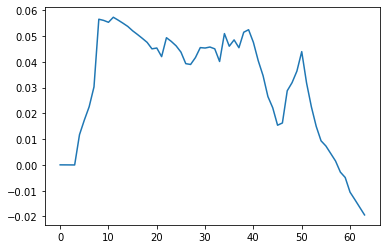

In [101]:
# We can show a plot
# Based on the values, 13 sub-communities is optimal, but the values are very close, 
# we could also use 10 in order to get a more easily interpretable solution

sns.lineplot(x = range(64), y = modularity_list)

In [102]:
# Collect membership values

comm_13 = comm_list[11]

comm_memb = []

for node in hp_net:
    for i in range(len(comm_13)):
        if node in comm_13[i]:
            comm_memb.append(i)
            
print(comm_memb)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 5, 0, 4, 0, 0, 6, 0, 7, 0, 0, 0, 3, 1, 8, 8, 9, 10, 10, 11, 12]


In [103]:
# We can add mebership to names as extracted from the centrality measure dataframe
comm_data = centrality_hp_net[['name']].copy()
comm_data['comm_memb'] = comm_memb

comm_data

,name,comm_memb
0,Regulus Arcturus Black,0
1,Sirius Black,0
25,Bellatrix Lestrange,0
45,Lord Voldemort,0
11,Albus Dumbledore,0
...,...,...
30,Xenophilius Lovegood,9
43,Tom Riddle Sr.,10
44,Mary Riddle,10
61,Hedwig,11


In [104]:
# When we check the 6 top characters based on PageRank, they are all in one community

comm_data[comm_data.name.isin(['Harry Potter', 'Lord Voldemort', 
                               'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Sirius Black'])]

,name,comm_memb
1,Sirius Black,0
45,Lord Voldemort,0
11,Albus Dumbledore,0
21,Hermione Granger,0
39,Harry Potter,0
58,Ron Weasley,0


In [105]:
# Actually we have one very big community, and the others are very small
# At this point, as the solution I would just state that all the important characters (or almost all for that matter)
# are in the same community, it seems in this network there exist connections between most of the pairs of characters
# except for some marginal ones, so performing community detection is not really useful
# But if instead of this, you add membership to characters data and perform some groupby, aggregation etc.
# that is also okay, assuming that you at least note that all the important characters are in the same community, 
# which is a mix of all the different categories and values in different columns of characters

comm_data.comm_memb.value_counts()

0     47
4      3
1      2
3      2
8      2
10     2
2      1
5      1
6      1
7      1
9      1
11     1
12     1
Name: comm_memb, dtype: int64

In [106]:
# If we want to look at the extra data, we need to add the memberships

characters = characters.merge(comm_data[['name','comm_memb']], on = 'name')
characters.head()

,id,name,bio,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death,comm_memb
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Male,NaN,Slytherin,Unknown,Non-corporeal,Human,Pure-blood,Black,NaN,NaN,Seeker,1961,1979,0
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Male,NaN,Gryffindor,Unknown,Unknown,Human,Pure-blood,Black,Grey,Order of the Phoenix,Animagus| nonverbal magic| Charms,"3 November,�1959","18 June,�1996",0
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,Female,Student,Gryffindor,Unknown,Unknown,Human,Pure-blood,Blond,Blue,Dumbledore's Army |Hogwarts School of Witchcra...,Divination,�1 September�1979-�31 August�1980,"2 May,�1998",0
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,Female,Student,Ravenclaw,Unknown,Swan,Human,Pure-blood�or�half-blood,Black,Dark,Dumbledore's Army |Hogwarts School of Witchcra...,Seeker,1 September�1978-31 August�1979,NaN,0
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Male,NaN,Slytherin,Unknown,Unknown,Human,Pure-blood,Dark,Dark,Lord Voldemort �| Death Eaters,NaN,Pre�1964,NaN,0


In [143]:
# We can calculate for example Birth year

def year_extraction(x):
    try:
        for i in range(len(x)):
            if str(x)[i] == '1':
                return float(str(x)[i:(i+4)])
                break
    except:
        return np.nan

characters['Birth_year'] = characters.Birth.apply(year_extraction)
# characters['Birth_year'] = characters.Birth.apply(lambda x: float(str(x)[-4:]) if (str(x)[-4] == 1 or x == np.nan) else np.nan)

In [144]:
# Create groupby object

characters_comm = characters.groupby('comm_memb')

In [145]:
# Look at different columns

characters_comm.Species.value_counts()

comm_memb  Species                
0          Human                      39
           Animal                      2
           Half-Human/Half-Giant       1
           House elf                   1
           Human�                      1
           Human�(Metamorphmagus)      1
           Human�(Werewolf�traits)     1
1          Human                       1
           Human�                      1
2          Human                       1
3          Half-Human/Half-Giant       1
           Human                       1
4          Human�                      3
5          Human                       1
6          Human                       1
7          Human                       1
8          Human                       2
9          Human                       1
10         Human                       2
11         Animal                      1
12         Ghost                       1
Name: Species, dtype: int64

In [146]:
characters_comm.House.value_counts()

comm_memb  House                       
0          Gryffindor                      21
           Slytherin                       11
           Ravenclaw                        3
           Hufflepuff                       2
           Beauxbatons Academy of Magic     1
1          Durmstrang Institute             1
           Hufflepuff                       1
3          Beauxbatons Academy of Magic     1
6          Gryffindor                       1
8          Gryffindor                       1
9          Revanclaw                        1
12         Ravenclaw                        1
Name: House, dtype: int64

In [147]:
characters_comm.Gender.value_counts()

comm_memb  Gender
0          Male      34
           Female    13
1          Male       2
2          Male       1
3          Female     1
           Male       1
4          Male       2
           Female     1
5          Female     1
6          Male       1
7          Male       1
8          Female     1
           Male       1
9          Male       1
10         Female     1
           Male       1
11         Female     1
12         Female     1
Name: Gender, dtype: int64

In [148]:
characters_comm.Birth_year.agg(np.mean)

comm_memb
0     1959.960000
1     1976.000000
2     1940.000000
3     1965.000000
4     1964.666667
5             NaN
6             NaN
7     1940.000000
8             NaN
9     1956.000000
10    1900.500000
11            NaN
12            NaN
Name: Birth_year, dtype: float64